In [1]:
#Annual Rebalancing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from empyrical import max_drawdown
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

#yearly returns calculation
def yearly_returns(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True) 
    returns = {}
    for year in range(1999, 2025): 
        start_date = f"{year-1}-12-31"
        end_date = f"{year}-12-31"
        start_price = df['Adj Close'].loc[:start_date].iloc[-1]
        end_price = df['Adj Close'].loc[:end_date].iloc[-1]
        yearly_return = (end_price - start_price) / start_price
        returns[year] = yearly_return
    return pd.Series(returns)

data = {
    'xlb': pd.read_csv("xlb_weekly_return_detailed.csv"),
    'xle': pd.read_csv("xle_weekly_return_detailed.csv"),
    'xlf': pd.read_csv("xlf_weekly_return_detailed.csv"),
    'xli': pd.read_csv("xli_weekly_return_detailed.csv"),
    'xlk': pd.read_csv("xlk_weekly_return_detailed.csv"),
    'xlp': pd.read_csv("xlp_weekly_return_detailed.csv"),
    'xlu': pd.read_csv("xlu_weekly_return_detailed.csv"),
    'xlv': pd.read_csv("xlv_weekly_return_detailed.csv"),
    'xly': pd.read_csv("xly_weekly_return_detailed.csv")
}

yearly_returns_dict = {key: yearly_returns(df) for key, df in data.items()}
final_df = pd.DataFrame(yearly_returns_dict)
final_df.index.name = 'Date'

cash_all=[]
for i in range(9):
    cash_l = 100
    cash_annual_l = []

    #cash calculation
    for year in range(1999, 2024):
        sorted_returns = final_df.loc[year].sort_values()
        next_year = year + 1
        if next_year in final_df.index:
            returns_next_year_l = final_df.loc[next_year][sorted_returns.index[i]]
            total_return_l = ((cash_l) * (1 + returns_next_year_l)).sum()
            cash_l = total_return_l
            cash_annual_l.append((year + 1, cash_l))
    cash_all.append(cash_annual_l)

for i in range(9):
    print(cash_all[i][-1])
annual_values=cash_all
daily_returns_df = pd.DataFrame()

for etf, df in data.items():
    df = df.reset_index() 
    df['Date'] = pd.to_datetime(df['Date'])
    df.rename(columns={'Return': etf}, inplace=True)
    if daily_returns_df.empty:
        daily_returns_df = df[['Date', etf]]
    else:
        daily_returns_df = pd.merge(daily_returns_df, df[['Date', etf]], on='Date', how='outer')

daily_returns_df.set_index('Date', inplace=True)
#returns
rows = []
for year in range(1999, 2025):
    sorted_etfs = final_df.loc[year].sort_values().index[:9]  # Get top 9 ETFs
    rows.append({"year": year, **{f"etf_{i}": etf for i, etf in enumerate(sorted_etfs)}})

result_dfs = pd.DataFrame(rows).set_index("year")

final_data = []
position_returns_dict = {}
position_mdd_dict = {}
for position in range(9):
    position_returns = pd.Series(dtype=float)  # Initialize empty Series
    for year in range(1999, 2025):
        etf = result_dfs.loc[year, f"etf_{position}"]
        year_data = daily_returns_df[etf][daily_returns_df.index.year == year+1]
        position_returns = pd.concat([position_returns, year_data])
    position_returns_dict[f"Position_{position}"] = position_returns
    position_mdd_dict[f"Position_{position}"] = max_drawdown(position_returns / 100) * 100
    # Create DataFrame with proper datetime index
    temp_df = pd.DataFrame({f"Position_{position}": position_returns})
    temp_df["Year"] = temp_df.index.year  # Now works with DatetimeIndex
    final_data.append(temp_df.groupby("Year").agg({
        f"Position_{position}": [
            ('MDD', lambda x: max_drawdown(x/100) * 100)
        ]
    }))
final_df = pd.concat(final_data, axis=1)
final_df.columns = final_df.columns.map('_'.join)
mdd_yearly=position_mdd_dict

(2024, 277.7130270883637)
(2024, 1725.0467670897024)
(2024, 1442.952537555379)
(2024, 587.8654877532158)
(2024, 654.4597191521977)
(2024, 630.1711891745587)
(2024, 375.2019924295904)
(2024, 414.3943847858665)
(2024, 533.6615415881224)


In [2]:
#Semi-Annual Rebalancing
import pandas as pd
import matplotlib.pyplot as plt
from empyrical import max_drawdown

#returns calculation
def semi_annual_returns(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True) 
    returns = {}
    for year in range(1999, 2025):
        start_date_1 = f"{year-1}-12-31"
        end_date_1 = f"{year}-06-30"
        start_price_1 = df['Adj Close'].loc[:start_date_1].iloc[-1]
        end_price_1 = df['Adj Close'].loc[:end_date_1].iloc[-1]
        half_year_return_1 = (end_price_1 - start_price_1) / start_price_1
        returns[f"{year}-01"] = half_year_return_1
        
        start_date_2 = f"{year}-06-30"
        end_date_2 = f"{year}-12-31"
        start_price_2 = df['Adj Close'].loc[:start_date_2].iloc[-1]
        end_price_2 = df['Adj Close'].loc[:end_date_2].iloc[-1]
        half_year_return_2 = (end_price_2 - start_price_2) / start_price_2
        returns[f"{year}-02"] = half_year_return_2
    
    return pd.Series(returns)

data = {
    'xlb': pd.read_csv("xlb_weekly_return_detailed.csv"),
    'xle': pd.read_csv("xle_weekly_return_detailed.csv"),
    'xlf': pd.read_csv("xlf_weekly_return_detailed.csv"),
    'xli': pd.read_csv("xli_weekly_return_detailed.csv"),
    'xlk': pd.read_csv("xlk_weekly_return_detailed.csv"),
    'xlp': pd.read_csv("xlp_weekly_return_detailed.csv"),
    'xlu': pd.read_csv("xlu_weekly_return_detailed.csv"),
    'xlv': pd.read_csv("xlv_weekly_return_detailed.csv"),
    'xly': pd.read_csv("xly_weekly_return_detailed.csv")
}

semi_annual_returns_dict = {key: semi_annual_returns(df) for key, df in data.items()}
final_df = pd.DataFrame(semi_annual_returns_dict)
final_df.index.name = 'Date'

cash_all=[]
for i in range(9):
    cash_l = 100
    cash_semi_annual_l = []

#cash calculation
    for period in final_df.index[1:-1]:
        sorted_returns = final_df.loc[period].sort_values()
        next_period = final_df.index[final_df.index.get_loc(period) + 1]
        returns_next_period_l = final_df.loc[next_period][sorted_returns.index[i]]
        total_return_l = ((cash_l) * (1 + returns_next_period_l)).sum()
        cash_l = total_return_l
        cash_semi_annual_l.append((next_period, cash_l))
    cash_all.append(cash_semi_annual_l)
     
for i in range(9):
    print(cash_all[i][-1])
semi_annual_values=cash_all
daily_returns_df = pd.DataFrame()

for etf, df in data.items():
    df = df.reset_index() 
    df['Date'] = pd.to_datetime(df['Date'])
    df.rename(columns={'Return': etf}, inplace=True)
    if daily_returns_df.empty:
        daily_returns_df = df[['Date', etf]]
    else:
        daily_returns_df = pd.merge(daily_returns_df, df[['Date', etf]], on='Date', how='outer')

daily_returns_df.set_index('Date', inplace=True)
#returns
rows = []
for date in final_df.index[1:]:
    sorted_etfs = final_df.loc[date].sort_values().index[:9]
    rows.append({"year": date, **{f"etf_{i}": etf for i, etf in enumerate(sorted_etfs)}})

result_dfs = pd.DataFrame(rows).set_index("year") 

#dictionary for results storage
final_result_dfs = {i: pd.Series(dtype=float) for i in range(9)}

position_mdd_dict = {}
for date in result_dfs.index:
    year, half = map(int, str(date).split("-"))  # Split formatted date
    if half == 1:
        next_half_start = pd.Timestamp(year, 7, 1)
        next_half_end = pd.Timestamp(year, 12, 31)
    else:
        next_half_start = pd.Timestamp(year+1, 1, 1)
        next_half_end = pd.Timestamp(year+1, 6, 30)
    
    next_half_end = min(next_half_end, daily_returns_df.index[-1])
    
    for position in range(9):
        etf = result_dfs.loc[date, f"etf_{position}"] 
        etf_returns = daily_returns_df[etf].loc[next_half_start:next_half_end]
        final_result_dfs[position] = pd.concat([final_result_dfs[position], etf_returns])

full_results = pd.concat(final_result_dfs, axis=1)
full_results.columns = [f"Position_{i}" for i in range(9)]
returns_decimal = full_results / 100

# mdd
max_dd_df = returns_decimal.groupby(returns_decimal.index.year).agg(
    {col: max_drawdown for col in returns_decimal.columns}
)

max_dd_df = max_dd_df * 100
mdd_by_position = {}

for column in returns_decimal.columns:
    mdd = max_drawdown(returns_decimal[column])
    mdd_by_position[column] = mdd * 100  # Convert to percentage
mdd_semi_annual=mdd_by_position

('2024-02', 774.6579593248788)
('2024-02', 860.2411134399879)
('2024-02', 351.2891486883048)
('2024-02', 569.3047624880186)
('2024-02', 1103.9343532693845)
('2024-02', 211.1374737297097)
('2024-02', 467.26979380383693)
('2024-02', 809.3180067484404)
('2024-02', 1183.7998824775127)


In [3]:
# Quarterly Rebalancing

import pandas as pd
import matplotlib.pyplot as plt

#returns calculations
def quarterly_returns(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True) 
    returns = {}
    for year in range(1999, 2025):
        
        start_date_1 = f"{year-1}-12-31"
        end_date_1 = f"{year}-03-31"
        start_price_1 = df['Adj Close'].loc[:start_date_1].iloc[-1]
        end_price_1 = df['Adj Close'].loc[:end_date_1].iloc[-1]
        quarter_return_1 = (end_price_1 - start_price_1) / start_price_1
        returns[f"{year}-Q1"] = quarter_return_1
        
        start_date_2 = f"{year}-03-31"
        end_date_2 = f"{year}-06-30"
        start_price_2 = df['Adj Close'].loc[:start_date_2].iloc[-1]
        end_price_2 = df['Adj Close'].loc[:end_date_2].iloc[-1]
        quarter_return_2 = (end_price_2 - start_price_2) / start_price_2
        returns[f"{year}-Q2"] = quarter_return_2
        
        start_date_3 = f"{year}-06-30"
        end_date_3 = f"{year}-09-30"
        start_price_3 = df['Adj Close'].loc[:start_date_3].iloc[-1]
        end_price_3 = df['Adj Close'].loc[:end_date_3].iloc[-1]
        quarter_return_3 = (end_price_3 - start_price_3) / start_price_3
        returns[f"{year}-Q3"] = quarter_return_3
        
        start_date_4 = f"{year}-09-30"
        end_date_4 = f"{year}-12-31"
        start_price_4 = df['Adj Close'].loc[:start_date_4].iloc[-1]
        end_price_4 = df['Adj Close'].loc[:end_date_4].iloc[-1]
        quarter_return_4 = (end_price_4 - start_price_4) / start_price_4
        returns[f"{year}-Q4"] = quarter_return_4
    
    return pd.Series(returns)

data = {
    'xlb': pd.read_csv("xlb_weekly_return_detailed.csv"),
    'xle': pd.read_csv("xle_weekly_return_detailed.csv"),
    'xlf': pd.read_csv("xlf_weekly_return_detailed.csv"),
    'xli': pd.read_csv("xli_weekly_return_detailed.csv"),
    'xlk': pd.read_csv("xlk_weekly_return_detailed.csv"),
    'xlp': pd.read_csv("xlp_weekly_return_detailed.csv"),
    'xlu': pd.read_csv("xlu_weekly_return_detailed.csv"),
    'xlv': pd.read_csv("xlv_weekly_return_detailed.csv"),
    'xly': pd.read_csv("xly_weekly_return_detailed.csv")
}
quarterly_returns_dict = {key: quarterly_returns(df) for key, df in data.items()}
final_df = pd.DataFrame(quarterly_returns_dict)
final_df.index.name = 'Date'

cash_all=[]
for i in range(9):
    cash_l = 100
    cash_quarterly_l = []

#cash calculation
    for period in final_df.index[3:-1]:
        sorted_returns = final_df.loc[period].sort_values()
        next_period = final_df.index[final_df.index.get_loc(period) + 1]
        returns_next_period_l = final_df.loc[next_period][sorted_returns.index[i]]
        total_return_l = ((cash_l) * (1 + returns_next_period_l)).sum()
        cash_l = total_return_l
        cash_quarterly_l.append((next_period, cash_l))
    cash_all.append(cash_quarterly_l)
     
for i in range(9):
    print(cash_all[i][-1])
quarterly_values=cash_all
daily_returns_df = pd.DataFrame()

for etf, df in data.items():
    df = df.reset_index() 
    df['Date'] = pd.to_datetime(df['Date'])
    df.rename(columns={'Return': etf}, inplace=True)
    if daily_returns_df.empty:
        daily_returns_df = df[['Date', etf]]
    else:
        daily_returns_df = pd.merge(daily_returns_df, df[['Date', etf]], on='Date', how='outer')

daily_returns_df.set_index('Date', inplace=True)

rows = []
for date in final_df.index[1:]:
    sorted_etfs = final_df.loc[date].sort_values().index[:9]
    rows.append({"year": date, **{f"etf_{i}": etf for i, etf in enumerate(sorted_etfs)}})
result_dfs = pd.DataFrame(rows).set_index("year") 
final_result_dfs = {i: pd.Series(dtype=float) for i in range(9)} 
def get_next_quarter_dates(date_str):
    year = int(date_str[:4])
    quarter = int(date_str[-1])
    
    # start and end dates for the next quarter
    if quarter == 1:
        start_date = f"{year}-04-01"
        end_date = f"{year}-06-30"
    elif quarter == 2:
        start_date = f"{year}-07-01"
        end_date = f"{year}-09-30"
    elif quarter == 3:
        start_date = f"{year}-10-01"
        end_date = f"{year}-12-31"
    else:  # If it's Q4, the next quarter is Q1 of the next year
        start_date = f"{year+1}-01-01"
        end_date = f"{year+1}-03-31"
    
    return start_date, end_date

for date in final_df.index[3:]:
    # next quarter dates
    start_date, end_date = get_next_quarter_dates(date)
    
    for position in range(9):
        etfs = result_dfs.loc[date, f"etf_{position}"]
        selected_returns = daily_returns_df[etfs]
        selected_returns_period = selected_returns.loc[start_date:end_date]
        avg_daily_returns = selected_returns_period
        final_result_dfs[position] = pd.concat([final_result_dfs[position], avg_daily_returns])
full_results = pd.concat(final_result_dfs, axis=1)
full_results.columns = [f"Position_{i}" for i in range(9)]
returns_decimal = full_results / 100

# mdd
max_dd_df = returns_decimal.groupby(returns_decimal.index.year).agg(
    {col: max_drawdown for col in returns_decimal.columns}
)
max_dd_df = max_dd_df * 100
mdd_by_position = {}
for column in returns_decimal.columns:
    mdd = max_drawdown(returns_decimal[column])
    mdd_by_position[column] = mdd * 100  # Convert to percentage
mdd_quarterly=mdd_by_position

('2024-Q4', 396.9200780459411)
('2024-Q4', 2553.6655157632426)
('2024-Q4', 254.19709249740137)
('2024-Q4', 346.95754991301567)
('2024-Q4', 700.323144865724)
('2024-Q4', 1201.3276542556835)
('2024-Q4', 947.1350733171168)
('2024-Q4', 796.1572845992835)
('2024-Q4', 245.20468219726305)


In [4]:
#Monthly Rebalancing
import pandas as pd
import numpy as np
from calendar import monthrange
from empyrical import max_drawdown

def monthly_returns(df):
    """Calculate monthly returns from daily price data"""
    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df.sort_index(inplace=True)
    
    returns = {}
    for year in range(1999, 2025):
        for month in range(1, 13):
            # Get last day of previous month
            start_date = pd.Timestamp(year=year, month=month, day=1) - pd.Timedelta(days=1)
            # Get last day of current month
            end_date = pd.Timestamp(year=year, month=month, day=monthrange(year, month)[1])
            
            try:
                start_price = df['Adj Close'].loc[:start_date].iloc[-1]
                end_price = df['Adj Close'].loc[:end_date].iloc[-1]
                returns[f"{year}-{month:02d}"] = (end_price - start_price) / start_price
            except IndexError:
                continue
    
    return pd.Series(returns)

etfs = ['xlb', 'xle', 'xlf', 'xli', 'xlk', 'xlp', 'xlu', 'xlv', 'xly']
data = {etf: pd.read_csv(f"{etf}_weekly_return_detailed.csv") for etf in etfs}
monthly_returns_dict = {key: monthly_returns(df) for key, df in data.items()}
final_df = pd.DataFrame(monthly_returns_dict)
final_df.index.name = 'Date'


cash_all=[]
for i in range(9):
    cash_l = 100
    cash_monthly_l = []

#cash calculation
    for period in final_df.index[11:-1]:
        sorted_returns = final_df.loc[period].sort_values()
        next_period = final_df.index[final_df.index.get_loc(period) + 1]
        returns_next_period_l = final_df.loc[next_period][sorted_returns.index[i]]
        total_return_l = ((cash_l) * (1 + returns_next_period_l)).sum()
        cash_l = total_return_l
        cash_monthly_l.append((next_period, cash_l))
    cash_all.append(cash_monthly_l)
     
for i in range(9):
    print(cash_all[i][-1])
monthly_values=cash_all
#daily returns
daily_returns_df = pd.DataFrame()
for etf, df in data.items():
    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date'])
    df = df[['Date', 'Return']].rename(columns={'Return': etf})
    daily_returns_df = pd.concat([daily_returns_df, df.set_index('Date')], axis=1)

daily_returns_df = daily_returns_df.resample('D').last().ffill()

monthly_returns_dict = {etf: monthly_returns(df) for etf, df in data.items()}
final_df = pd.DataFrame(monthly_returns_dict)
final_df.index = pd.to_datetime(final_df.index)
final_df = final_df[~final_df.index.duplicated(keep='last')]

# Initialize storage for ETF positions
rows = []
for date in final_df.index:
    sorted_etfs = final_df.loc[date].sort_values().index[:9]
    rows.append({
        "year": date,
        **{f"etf_{i}": etf for i, etf in enumerate(sorted_etfs)}
    })
result_dfs = pd.DataFrame(rows).set_index("year")

#returns
final_result_dfs = {i: pd.Series(dtype=float) for i in range(9)}

for date in final_df.index[11:]:  # Skip first year for lookback
    # Calculate next month period
    year = date.year
    month = date.month
    
    if month == 12:
        next_year = year + 1
        next_month = 1
    else:
        next_year = year
        next_month = month + 1
    
    try:
        start_date = pd.Timestamp(year=next_year, month=next_month, day=1)
        end_date = pd.Timestamp(
            year=next_year, 
            month=next_month, 
            day=monthrange(next_year, next_month)[1]
        )
    except:
        continue
    
    # Clamp to available data
    end_date = min(end_date, daily_returns_df.index.max())
    
    for position in range(9):
        etf = result_dfs.loc[date, f"etf_{position}"]
        returns = daily_returns_df[etf].loc[start_date:end_date]
        
        # Remove duplicates
        existing = final_result_dfs[position].index
        new_returns = returns[~returns.index.isin(existing)]
        
        final_result_dfs[position] = pd.concat([
            final_result_dfs[position], 
            new_returns
        ])

full_results = pd.concat(final_result_dfs, axis=1, verify_integrity=True)
full_results.columns = [f"Position_{i}" for i in range(9)]

#max drawdown
max_dd_df = full_results.groupby(full_results.index.year).agg({
    col: lambda x: max_drawdown(x/100) * 100  # Handle percentage conversion
    for col in full_results.columns
})
full_results=full_results/100

mdd_by_position = {}
for column in full_results.columns:
    mdd = max_drawdown(full_results[column])
    mdd_by_position[column] = mdd * 100  # Convert to percentage
mdd_monthly=mdd_by_position


('2024-12', 325.58793587721203)
('2024-12', 766.8462754025509)
('2024-12', 385.73699509462193)
('2024-12', 1921.5467125883918)
('2024-12', 485.5206181687041)
('2024-12', 2257.6166345907595)
('2024-12', 702.8270539640315)
('2024-12', 237.33335029034808)
('2024-12', 410.9883728136202)


In [5]:
# Weekly Rebalancing
import pandas as pd
import numpy as np
from empyrical import max_drawdown

# load data
etfs = ['xlb', 'xle', 'xlf', 'xli', 'xlk', 'xlp', 'xlu', 'xlv', 'xly']
data = {etf: pd.read_csv(f"{etf}_weekly_return_detailed.csv") for etf in etfs}

def calculate_weekly_returns(data):
    results = {}
    for name, df in data.items():
        df['Date'] = pd.to_datetime(df['Date'])
        df = df.sort_values('Date')
        df['Year_Week'] = df['Date'].dt.strftime('%Y-%U')
        df = df.set_index('Date')
        weekly_returns = []
        # Get the last close of the week before 1999
        prev_week = df[df['Year_Week'] == '1998-52']
        if prev_week.empty:
            continue
        r1 = prev_week['Adj Close'].iloc[-1]
        for week in df[df.index.year >= 1999]['Year_Week'].unique():
            week_data = df[df['Year_Week'] == week]
            if not week_data.empty:
                r2 = week_data['Adj Close'].iloc[-1]
                weekly_return = (r2 - r1) / r1
                weekly_returns.append((week, weekly_return))
                r1 = r2
            else:
                weekly_returns.append((week, np.nan))
        results[name] = pd.DataFrame(weekly_returns, columns=['Year_Week', 'Weekly_Return'])
    return results

weekly_returns_dict = calculate_weekly_returns(data)

final_df = pd.DataFrame({key: df['Weekly_Return'].values for key, df in weekly_returns_dict.items()})
final_df.index = weekly_returns_dict[list(weekly_returns_dict.keys())[0]]['Year_Week']
final_df.index.name = 'Year_Week'

cash_all=[]
for i in range(9):
    cash_l = 100
    cash_weekly_l = []

#cash calculation
    for period in final_df.index[51:-1]:
        sorted_returns = final_df.loc[period].sort_values()
        next_period = final_df.index[final_df.index.get_loc(period) + 1] 
        returns_next_period_l = final_df.loc[next_period][sorted_returns.index[i]]
        total_return_l = ((cash_l) * (1 + returns_next_period_l)).sum()
        cash_l = total_return_l
        cash_weekly_l.append((next_period, cash_l))
    cash_all.append(cash_weekly_l)
for i in range(9):
     print(cash_all[i][-1])
weekly_values=cash_all

# daily returns
daily_returns_df = pd.DataFrame()
for etf, df in data.items():
    temp = df.copy()
    temp['Date'] = pd.to_datetime(temp['Date'])
    temp = temp[['Date', 'Return']].rename(columns={'Return': etf})
    temp = temp.set_index('Date')
    daily_returns_df = pd.concat([daily_returns_df, temp], axis=1)
daily_returns_df = daily_returns_df.sort_index()
daily_returns_df['Year_Week'] = daily_returns_df.index.to_series().dt.strftime('%Y-%U')

#ETF selection
rows = []
for date in final_df.index[1:]:
    sorted_etfs = final_df.loc[date].sort_values().index[:9]
    rows.append({"year": date, **{f"etf_{i}": etf for i, etf in enumerate(sorted_etfs)}})
result_dfs = pd.DataFrame(rows).set_index("year")

def get_next_week(year_week):
    year, week = map(int, year_week.split('-'))
    if week == 52:
        if f"{year}-53" in final_df.index:
            return f"{year}-53"
        elif f"{year+1}-00" in final_df.index:
            return f"{year+1}-00"
        else:
            return f"{year+1}-01"
    elif week == 53:
        if f"{year+1}-00" in final_df.index:
            return f"{year+1}-00"
        else:
            return f"{year+1}-01"
    else:
        return f"{year}-{week+1:02d}"

# weekly returns aggregation
final_result_dfs = {i: pd.Series(dtype=float) for i in range(9)}
for date in final_df.index[51:]:  # skip first year for lookback
    for position in range(9):
        etf = result_dfs.loc[date, f"etf_{position}"]
        # Filter daily returns for this ETF and the next week
        next_week = get_next_week(date)
        mask = daily_returns_df['Year_Week'] == next_week
        selected_returns = daily_returns_df.loc[mask, etf]
        final_result_dfs[position] = pd.concat([final_result_dfs[position], selected_returns])

full_results = pd.concat(final_result_dfs, axis=1)
full_results.columns = [f"Position_{i}" for i in range(9)]

#max drawdown
returns_decimal = full_results / 100
max_dd_df = returns_decimal.groupby(returns_decimal.index.year).agg(
    {col: max_drawdown for col in returns_decimal.columns}
) * 100

full_results=full_results/100
mdd_by_position = {}
for column in full_results.columns:
    mdd = max_drawdown(full_results[column])
    mdd_by_position[column] = mdd * 100 
mdd_weekly=mdd_by_position

('2024-52', 1386.5743113036328)
('2024-52', 691.9310680975408)
('2024-52', 864.1135976742763)
('2024-52', 1160.7385933957644)
('2024-52', 786.8437118492079)
('2024-52', 376.3822510132642)
('2024-52', 513.61554787712)
('2024-52', 195.50960894794952)
('2024-52', 485.9352215872619)


In [6]:
# Daily Rebalancing
import pandas as pd
import numpy as np
from empyrical import max_drawdown

#load data
etfs = ['xlb', 'xle', 'xlf', 'xli', 'xlk', 'xlp', 'xlu', 'xlv', 'xly']
data = {etf: pd.read_csv(f"{etf}_weekly_return_detailed.csv") for etf in etfs}

def calculate_daily_returns(data):
    results = {}
    for name, df in data.items():
        df['Date'] = pd.to_datetime(df['Date'])
        df = df.sort_values('Date')
        df = df.set_index('Date')
        df['Daily_Return'] = df['Adj Close'].pct_change()
        results[name] = df[['Daily_Return']].copy()
    return results

daily_returns_dict = calculate_daily_returns(data)

final_df = pd.DataFrame({key: df['Daily_Return'] for key, df in daily_returns_dict.items()})
final_df = final_df.loc['1999-12-31':]  # Start from specified date

# Cash Calculation
cash_all = []
for i in range(9):
    cash_l = 100
    cash_daily_l = []
    
    for date in final_df.index[:-1]:  # Skip first day for lookback
        # Get previous day's returns
        prev_day = final_df.index[final_df.index.get_loc(date)]
        sorted_returns = final_df.loc[prev_day].sort_values()
        
        # Invest in next day's returns
        next_day = final_df.index[final_df.index.get_loc(date) + 1]
        returns_next_day = final_df.loc[next_day][sorted_returns.index[i]]
        
        total_return_l = cash_l * (1 + returns_next_day)
        cash_l = total_return_l
        cash_daily_l.append((next_day, cash_l))
    
    cash_all.append(cash_daily_l)

for i in range(9):
    print(cash_all[i][-1])
daily_values=cash_all

rows = []
for date in final_df.index[:]:
    prev_day = final_df.index[final_df.index.get_loc(date)]
    sorted_etfs = final_df.loc[prev_day].sort_values().index[:9]
    rows.append({"date": date, **{f"etf_{i}": etf for i, etf in enumerate(sorted_etfs)}})

result_dfs = pd.DataFrame(rows).set_index("date")

final_result_dfs = {i: pd.Series(dtype=float) for i in range(9)}
for date in final_df.index[:-1]:
    for position in range(9):
        etf = result_dfs.loc[date, f"etf_{position}"]
        next_day = final_df.index[final_df.index.get_loc(date) + 1]
        selected_return = final_df.loc[next_day, etf]
        # Replace deprecated append with pd.concat
        final_result_dfs[position] = pd.concat([
            final_result_dfs[position], 
            pd.Series(selected_return, index=[next_day])
        ])

full_results = pd.concat(final_result_dfs, axis=1)
full_results.columns = [f"Position_{i}" for i in range(9)]

#max drawdown per year
returns_decimal = full_results
max_dd_df = returns_decimal.groupby(returns_decimal.index.year).agg(
    {col: max_drawdown for col in returns_decimal.columns}
) * 100

mdd_by_position = {}
for column in full_results.columns:
    mdd = max_drawdown(full_results[column])
    mdd_by_position[column] = mdd * 100  
mdd_daily=mdd_by_position

(Timestamp('2024-12-31 00:00:00'), 1245.1065080789701)
(Timestamp('2024-12-31 00:00:00'), 2462.2324940381236)
(Timestamp('2024-12-31 00:00:00'), 2240.121000648229)
(Timestamp('2024-12-31 00:00:00'), 471.200472463639)
(Timestamp('2024-12-31 00:00:00'), 1170.1194892767312)
(Timestamp('2024-12-31 00:00:00'), 617.2116006801194)
(Timestamp('2024-12-31 00:00:00'), 339.13004687334484)
(Timestamp('2024-12-31 00:00:00'), 137.45813412099974)
(Timestamp('2024-12-31 00:00:00'), 127.64380523156369)


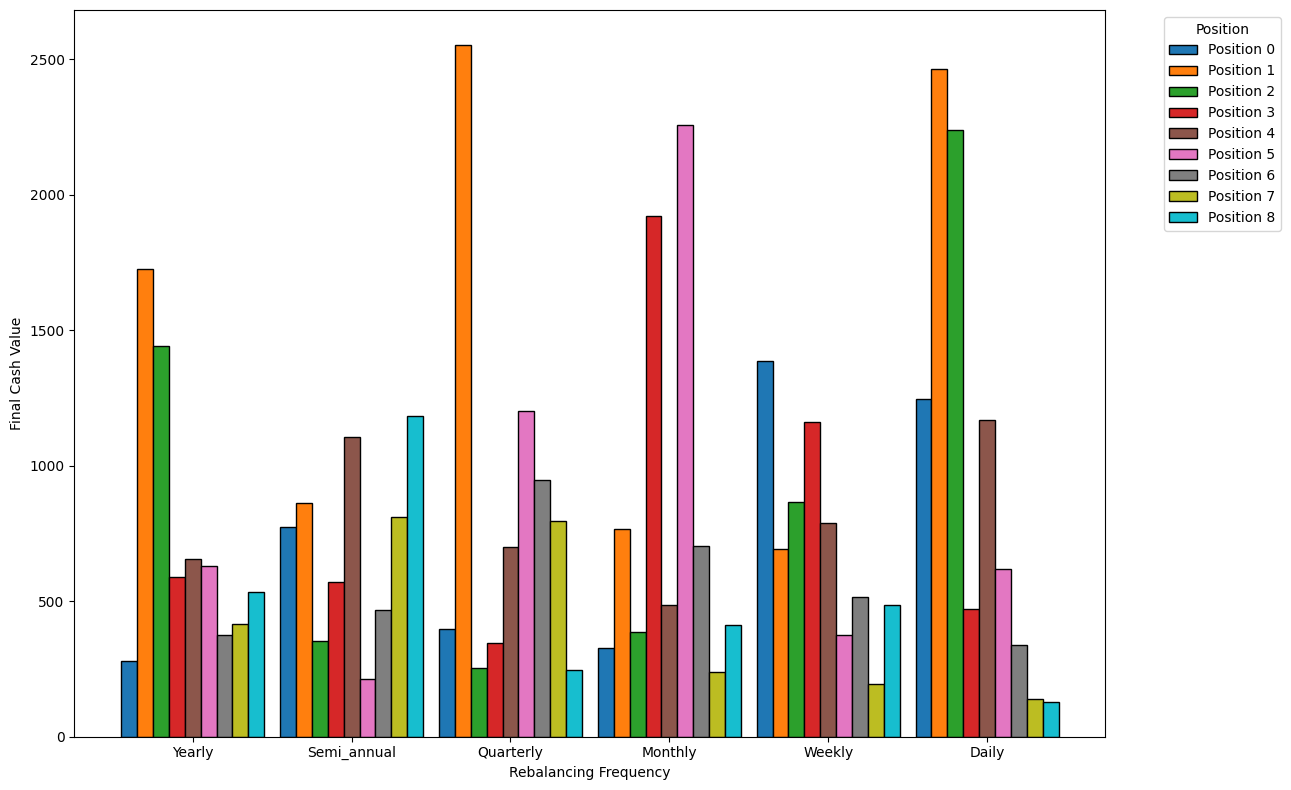

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def get_scalar(val):
    if isinstance(val, (list, tuple, np.ndarray)):
        # Recursively extract until scalar is found
        return get_scalar(val[-1])
    return val

# cash_data dictionary 
cash_data = {
    'yearly': [get_scalar(annual_values[i]) for i in range(9)],
    'semi_annual': [get_scalar(semi_annual_values[i]) for i in range(9)],
    'quarterly': [get_scalar(quarterly_values[i]) for i in range(9)],
    'monthly': [get_scalar(monthly_values[i]) for i in range(9)],
    'weekly': [get_scalar(weekly_values[i]) for i in range(9)],
    'daily': [get_scalar(daily_values[i]) for i in range(9)]
}

frequencies = list(cash_data.keys())
positions = list(range(9))

# Color map for positions
position_colors = plt.cm.tab10(np.linspace(0, 1, 9))

fig, ax = plt.subplots(figsize=(13, 8))
bar_width = 0.1
x = np.arange(len(frequencies))

# For each position, plot a bar for every frequency
for pos in positions:
    values = [cash_data[freq][pos] for freq in frequencies]
    offset = (pos - 4) * bar_width  # Center the group
    ax.bar(x + offset, values, bar_width, label=f'Position {pos}', color=position_colors[pos], edgecolor='black')

ax.set_xticks(x)
ax.set_xticklabels([freq.capitalize() for freq in frequencies])
ax.set_xlabel('Rebalancing Frequency')
ax.set_ylabel('Final Cash Value')
#ax.set_title('Final Cash Value by Position and Frequency')
ax.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


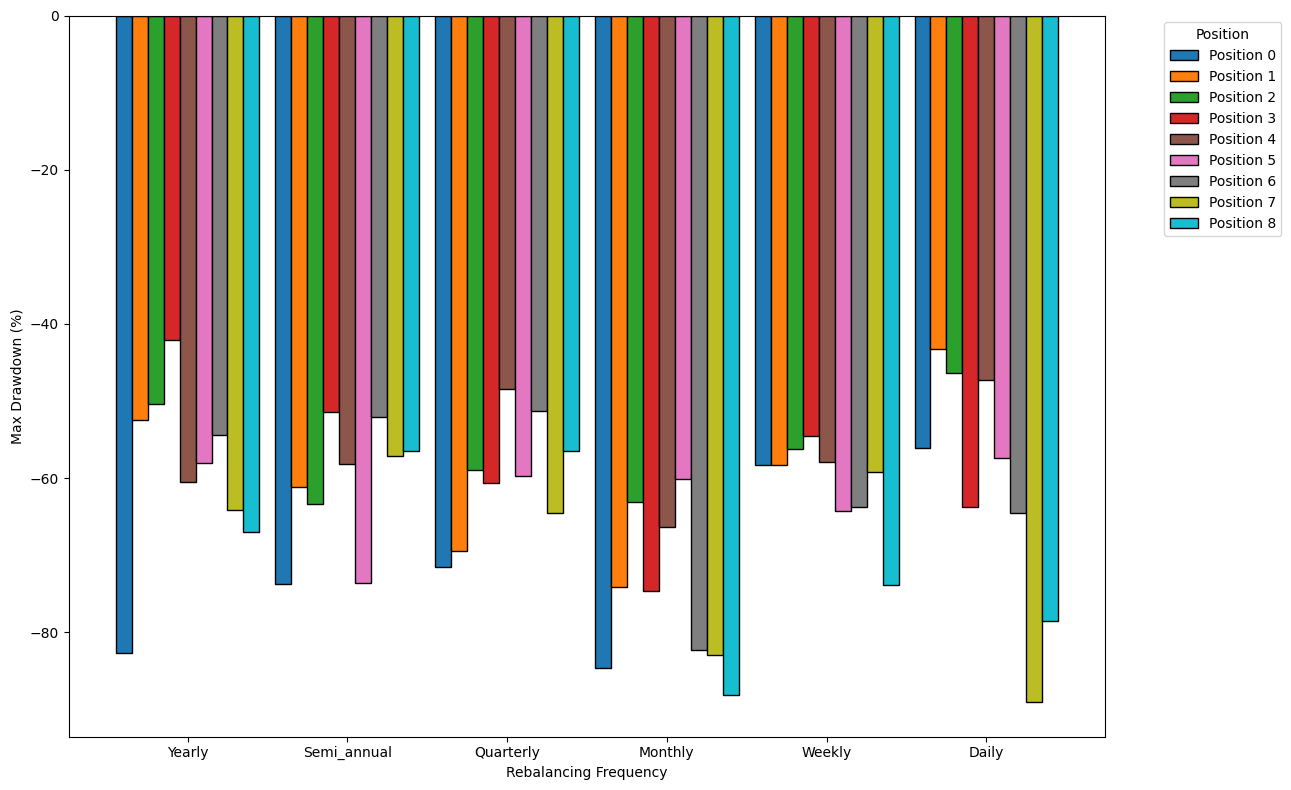

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare mdd_data dictionary
mdd_data = {
    'yearly': [mdd_yearly[f'Position_{i}'] for i in range(9)],
    'semi_annual': [mdd_semi_annual[f'Position_{i}'] for i in range(9)],
    'quarterly': [mdd_quarterly[f'Position_{i}'] for i in range(9)],
    'monthly': [mdd_monthly[f'Position_{i}'] for i in range(9)],
    'weekly': [mdd_weekly[f'Position_{i}'] for i in range(9)],
    'daily': [mdd_daily[f'Position_{i}'] for i in range(9)]
}

frequencies = list(mdd_data.keys())
positions = list(range(9))

# Color map for positions
position_colors = plt.cm.tab10(np.linspace(0, 1, 9))

fig, ax = plt.subplots(figsize=(13, 8))
bar_width = 0.1
x = np.arange(len(frequencies))

# For each position, plot a bar for every frequency
for pos in positions:
    values = [mdd_data[freq][pos] for freq in frequencies]
    offset = (pos - 4) * bar_width
    ax.bar(
        x + offset, 
        values, 
        bar_width, 
        label=f'Position {pos}', 
        color=position_colors[pos], 
        edgecolor='black'
    )

ax.set_xticks(x)
ax.set_xticklabels([freq.capitalize() for freq in frequencies])
ax.set_xlabel('Rebalancing Frequency')
ax.set_ylabel('Max Drawdown (%)')
#ax.set_title('Max Drawdown by Position and Frequency')
ax.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [9]:
import pandas as pd
import numpy as np
from empyrical import max_drawdown
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

df=pd.read_csv("spy_weekly_return_detailed.csv")
df["Date"]=pd.to_datetime(df["Date"])

df1=df[df["Year"]>=2000]
df1["Return"]=df1["Return"]/100
bh_maxdd=max_drawdown(df1["Return"])*100
bh_maxdd

-55.19175101232929

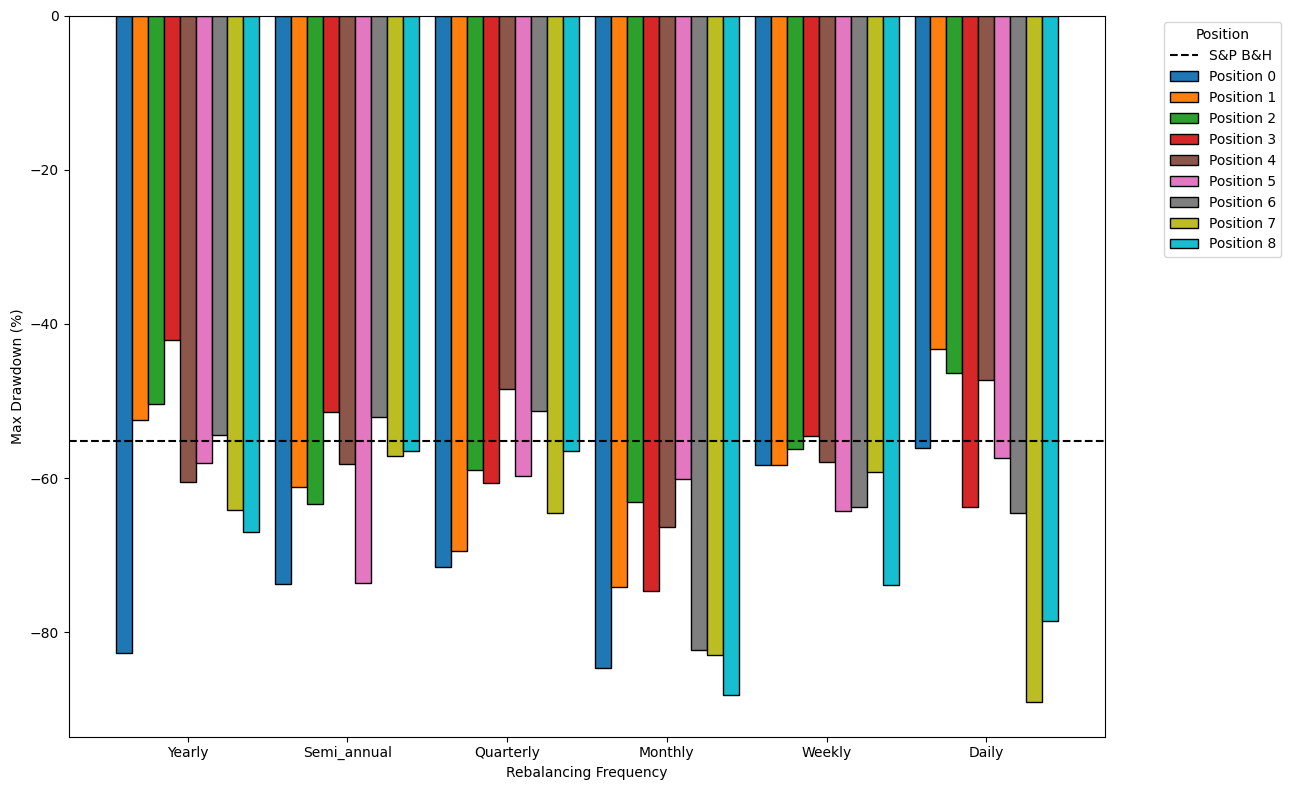

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare mdd_data dictionary
mdd_data = {
    'yearly': [mdd_yearly[f'Position_{i}'] for i in range(9)],
    'semi_annual': [mdd_semi_annual[f'Position_{i}'] for i in range(9)],
    'quarterly': [mdd_quarterly[f'Position_{i}'] for i in range(9)],
    'monthly': [mdd_monthly[f'Position_{i}'] for i in range(9)],
    'weekly': [mdd_weekly[f'Position_{i}'] for i in range(9)],
    'daily': [mdd_daily[f'Position_{i}'] for i in range(9)]
}

frequencies = list(mdd_data.keys())
positions = list(range(9))

# Color map for positions
position_colors = plt.cm.tab10(np.linspace(0, 1, 9))

fig, ax = plt.subplots(figsize=(13, 8))
bar_width = 0.1
x = np.arange(len(frequencies))

# For each position, plot a bar for every frequency
for pos in positions:
    values = [mdd_data[freq][pos] for freq in frequencies]
    offset = (pos - 4) * bar_width
    ax.bar(
        x + offset, 
        values, 
        bar_width, 
        label=f'Position {pos}', 
        color=position_colors[pos], 
        edgecolor='black'
    )

ax.set_xticks(x)
ax.set_xticklabels([freq.capitalize() for freq in frequencies])
# Add horizontal line at -55.19
ax.axhline(y=-55.19, color='black', linestyle='--', linewidth=1.5, label='S&P B&H')

# Update legend
ax.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_xlabel('Rebalancing Frequency')
ax.set_ylabel('Max Drawdown (%)')
#ax.set_title('Max Drawdown by Position and Frequency')
ax.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
